In [1]:
import pandas as pd

# Cargar dataset
df = pd.read_csv('../comentarios_deportivos_a58295c0-8866-44e6-b80e-1ca5f7c2342b.csv')

# Vista rápida del dataset
df.head()

,id,comentario,sentimiento
0,180,"Partido equilibrado, resultado justo.",Neutral
1,177,"Encuentro equilibrado, reparto justo de puntos.",Neutral
2,189,Resultado esperado dadas las circunstancias.,Neutral
3,132,Nuestro ataque no generó peligro suficiente.,Negativo
4,148,"Sin sobresaltos, rendimiento promedio.",Neutral


In [3]:
import re

# Función simple y efectiva para limpiar texto
def limpiar_texto_simple(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúñü\s]", "", texto) # Solo letras y espacios
    texto = re.sub(r"\s+", " ", texto).strip() # Eliminar espacios
    return texto

# Aplicar la función de limpieza al dataset
df['comentario_limpio'] = df['comentario'].apply(limpiar_texto_simple)

# Revisar los resultados
df[['comentario', 'comentario_limpio']].sample(10)

,comentario,comentario_limpio
189,La estrategia funcionó perfectamente.,la estrategia funcionó perfectamente
104,"Mal partido, fallamos demasiadas oportunidades.",mal partido fallamos demasiadas oportunidades
58,La defensa estuvo impecable hoy.,la defensa estuvo impecable hoy
102,Empate que refleja claramente el rendimiento.,empate que refleja claramente el rendimiento
95,Ambos equipos tuvieron oportunidades.,ambos equipos tuvieron oportunidades
13,Ambos equipos tuvieron oportunidades.,ambos equipos tuvieron oportunidades
85,"Partido equilibrado, resultado justo.",partido equilibrado resultado justo
125,Empate que refleja claramente el rendimiento.,empate que refleja claramente el rendimiento
148,Partido sin mucha emoción.,partido sin mucha emoción
67,"Perdimos merecidamente, mal rendimiento general.",perdimos merecidamente mal rendimiento general


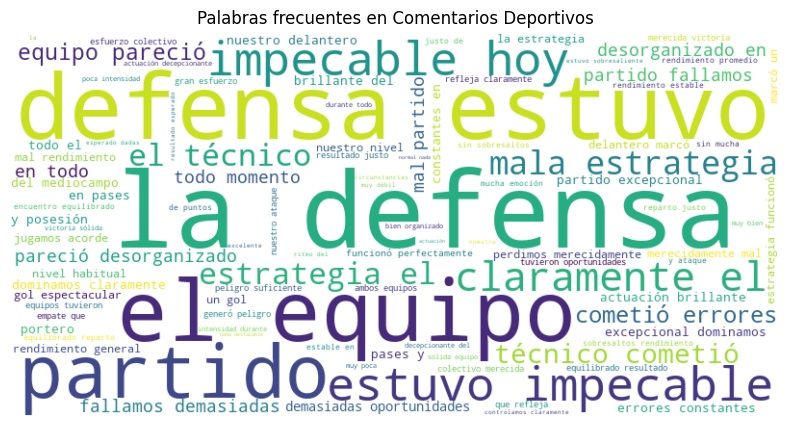

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrar comentarios útiles
df_filtrado = df[df['comentario_limpio'].str.strip().astype(bool)]

# Unir todos los comentarios limpios en un solo texto
texto_total = " ".join(df_filtrado['comentario_limpio'])

# Generar la nube de palabras
if texto_total:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_total)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Palabras frecuentes en Comentarios Deportivos')
    plt.show()
else:
    print("No hay palabras útiles después del preprocesamiento.")

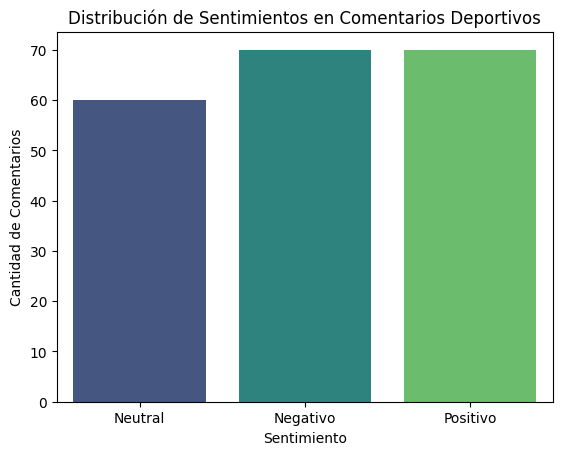

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar si la columna 'sentimiento' existe
if 'sentimiento' in df.columns:
    sns.countplot(data=df, x='sentimiento', palette='viridis', hue='sentimiento')
    plt.title('Distribución de Sentimientos en Comentarios Deportivos')
    plt.xlabel('Sentimiento')
    plt.ylabel('Cantidad de Comentarios')
    plt.show()
else:
    print("La columna 'sentimiento' no existe en el DataFrame.")

In [ ]:
import ipywidgets as widgets
from IPython.display import display

sentimiento_widget = widgets.Dropdown(options=df['sentimiento'].unique(), description='Sentimiento:')

def mostrar_comentarios(sentimiento):
    seleccionados = df[df['sentimiento'] == sentimiento]
    display(seleccionados[['comentario', 'sentimiento']].sample(10))

widgets.interactive(mostrar_comentarios, sentimiento=sentimiento_widget)

interactive(children=(Dropdown(description='Sentimiento:', options=('Neutral', 'Negativo', 'Positivo'), value=…